# CNN FashionMNIST 실습

In [2]:
import tensorflow as tf

In [23]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [25]:
# 이미지 형태로 reeshape
X_train = X_train.reshape(-1, 28,28, 1)
X_test = X_test.reshape(-1, 28,28, 1)

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


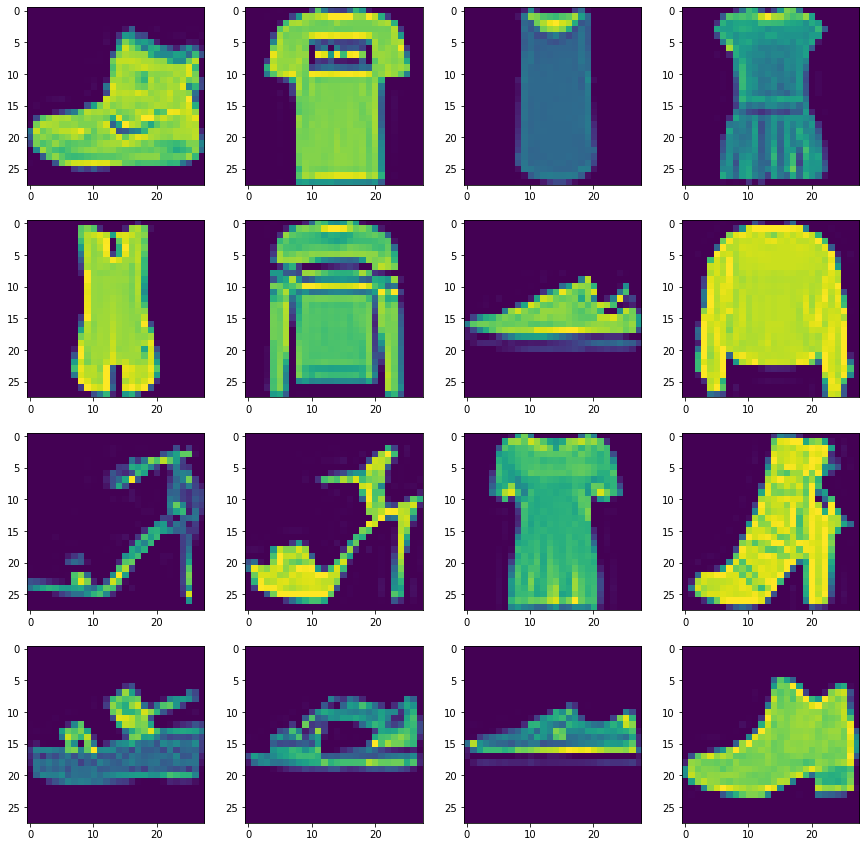

In [26]:
# Plot으로 데이터 확인
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
for i in range(16) :
    plt.subplot(4, 4, i+1)
    plt.imshow(X_train[i].reshape(28,28))
plt.show()

## Layer Build - CNN 

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [31]:
model = tf.keras.Sequential([
    Conv2D(32, (3,3), input_shape=(28, 28, 1)),
    Conv2D(32, (3,3)),
    #MaxPool2D(strides=1),
    Conv2D(64, (3,3)),
    Conv2D(64, (3,3)),
    #MaxPool2D(strides=1),
    Conv2D(128, (3,3)),
    Conv2D(128, (3,3)),
    #MaxPool2D(strides=1),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
    
])

In [32]:
model.compile(optimizers=Adam,
             loss= 'sparse_categorical_crossentropy',
            metrics=['accuracy'])
history = model.fit(X_train, y_train,
                   epochs=5,
                   batch_size=30)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 549s 9ms/sample - loss: 0.8952 - accuracy: 0.7833
Epoch 2/5
60000/60000 [==============================] - 720s 12ms/sample - loss: 0.4291 - accuracy: 0.8485
Epoch 3/5
60000/60000 [==============================] - 700s 12ms/sample - loss: 0.4004 - accuracy: 0.8633
Epoch 4/5
60000/60000 [==============================] - 743s 12ms/sample - loss: 0.3663 - accuracy: 0.8725
Epoch 5/5
60000/60000 [==============================] - 690s 12ms/sample - loss: 0.3790 - accuracy: 0.8777


In [34]:
loss, acc = model.evaluate(X_train, y_train, verbose=2)
print('정확도:{:5.2f}%'.format(acc*100))

60000/1 - 183s - loss: 0.3123 - accuracy: 0.8753
정확도:87.53%


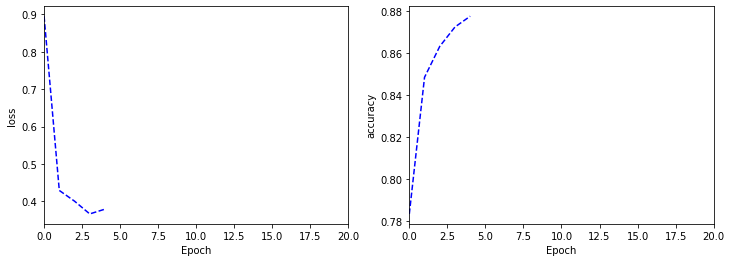

In [35]:
plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b--', label='loss')
#plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.xlim(0, 20)
plt.legend

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'b--', label='loss')
#plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.xlim(0, 20)
plt.legend

plt.show()

## VGGNet과 동일한 모델 생성

In [48]:
model = tf.keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPool2D(strides = (2,2)),
    Dropout(rate=0.5),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    Conv2D(256, (3,3), padding='valid', activation='relu'),
    MaxPool2D(strides = (2,2)),
    Dropout(rate=0.5),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(rate=0.5),
    Dense(10, activation='softmax')
    
])

In [49]:
model.compile(optimizers=Adam,
             loss= 'sparse_categorical_crossentropy',
            metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 6, 6, 256)        

In [50]:
history = model.fit(X_train, y_train,
                   epochs=3,
                   batch_size=30,
                   validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 550s 11ms/sample - loss: 0.4888 - accuracy: 0.8255 - val_loss: 0.3086 - val_accuracy: 0.8879
Epoch 2/3
48000/48000 [==============================] - 452s 9ms/sample - loss: 0.3655 - accuracy: 0.8738 - val_loss: 0.3013 - val_accuracy: 0.8890
Epoch 3/3
48000/48000 [==============================] - 417s 9ms/sample - loss: 0.3612 - accuracy: 0.8759 - val_loss: 0.3196 - val_accuracy: 0.8808


In [51]:
loss, acc = model.evaluate(X_train, y_train, verbose=2)
print('정확도:{:5.2f}%'.format(acc*100))

60000/1 - 98s - loss: 0.2676 - accuracy: 0.8861
정확도:88.61%


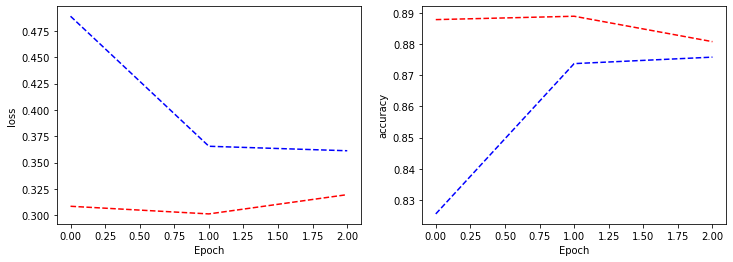

In [53]:
plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b--', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'b--', label='loss')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend

plt.show()